<a href="https://colab.research.google.com/github/Chandrasekhar1919/chandra_hds5210/blob/main/final/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
Objective:
The goal is to analyze the performance of Formula 1 drivers by calculating their position gain in races. Position gain is defined as the difference between a driver’s starting grid position and their final race position. By summing this gain across all races, we can identify the drivers who demonstrate the most improvement during races.

Task:

Calculate the position gain for each driver in each race.
Identify the drivers with the highest total position gain across all races.
Visualize the top drivers with the highest position gains.
This analysis will help highlight drivers who excel at moving up through the field during races.

Datasets: I have took them from the kaggle. I took both csv file and convert one of the file to json using the online tools. I have took that from the kaggle (https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=drivers.csv). In that we have a lagre various datasets from that i have used the drivers, drivers_standings as csv and results.csv was converted to json.

In [1]:
import pandas as pd

STEP-1:LOADING DATA

In [10]:
def load_data():
    """
    Load datasets from specified paths.

    Returns:
        tuple: DataFrames for drivers, standings, and results.

    Example:
        >>> drivers, standings, results = load_data()
        >>> isinstance(drivers, pd.DataFrame)
        True
        >>> isinstance(standings, pd.DataFrame)
        True
        >>> isinstance(results, pd.DataFrame)
        True
    """
    drivers = pd.read_csv('/content/drivers.csv')
    standings = pd.read_csv('/content/driver_standings.csv')
    results = pd.read_json('/content/results.json')
    return drivers, standings, results

drivers, standings, results = load_data()

DISPLAYING THE DATA

In [11]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [12]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [13]:
standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


STEP-2:CLEANING THE DATA

clean_drivers(drivers):
Cleans the drivers dataset by filling missing values for the number and code columns, converting the dob column to a datetime format, and adding an age column based on the date of birth.

This ensures the dataset is clean, consistent, and ready for analysis.

In [14]:
def clean_drivers(drivers):
    """
    Clean the drivers dataset by filling missing values and adding new fields.

    Args:
        drivers (pd.DataFrame): The drivers DataFrame.

    Returns:
        pd.DataFrame: Cleaned drivers DataFrame with age column.

    Example:
        >>> drivers = pd.DataFrame({'dob': ['1985-01-07', None]})
        >>> clean_drivers(drivers)['age'].notnull().all()
        True
    """
    drivers['number'] = drivers['number'].fillna('Unknown')
    drivers['code'] = drivers['code'].fillna('Unknown')
    drivers['dob'] = pd.to_datetime(drivers['dob'])
    drivers['age'] = (pd.Timestamp.now() - drivers['dob']).dt.days // 365
    return drivers

clean_results(results):
Cleans the results dataset by removing rows with missing values in critical columns (driverId and raceId).

In [15]:
def clean_results(results):
    """
    Clean the results dataset by dropping rows with missing critical fields.

    Args:
        results (pd.DataFrame): The results DataFrame.

    Returns:
        pd.DataFrame: Cleaned results DataFrame.

    Example:
        >>> results = pd.DataFrame({'driverId': [1, None], 'raceId': [2, 3]})
        >>> clean_results(results).shape[0]
        1
    """
    results = results.dropna(subset=['driverId', 'raceId'])
    return results

STEP-3: MERGING

merge_datasets(drivers, standings, results):
Merges the drivers, standings, and results datasets into a single DataFrame, combining all related information using shared keys (driverId and raceId).

In [19]:
def merge_datasets(drivers, standings, results):
    """
    Merge drivers, standings, and results datasets.

    Args:
        drivers (pd.DataFrame): Drivers DataFrame.
        standings (pd.DataFrame): Standings DataFrame.
        results (pd.DataFrame): Results DataFrame.

    Returns:
        pd.DataFrame: Combined dataset with all information.

    Example:
        >>> drivers = pd.DataFrame({'driverId': [1], 'name': ['Lewis']})
        >>> standings = pd.DataFrame({'raceId': [2], 'driverId': [1], 'points': [25]})
        >>> results = pd.DataFrame({'raceId': [2], 'driverId': [1], 'time': ['1:30']})
        >>> merge_datasets(drivers, standings, results).shape[0]
        1
    """
    merged_results = pd.merge(results, drivers, on='driverId', how='left')
    final_df = pd.merge(merged_results, standings, on=['raceId', 'driverId'], how='left')
    return final_df

final_df = merge_datasets(drivers, standings, results)

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           26519 non-null  int64  
 1   raceId             26519 non-null  int64  
 2   driverId           26519 non-null  int64  
 3   constructorId      26519 non-null  int64  
 4   number_x           26519 non-null  object 
 5   grid               26519 non-null  int64  
 6   position_x         26519 non-null  object 
 7   positionText_x     26519 non-null  object 
 8   positionOrder      26519 non-null  int64  
 9   points_x           26519 non-null  float64
 10  laps               26519 non-null  int64  
 11  time               26519 non-null  object 
 12  milliseconds       26519 non-null  object 
 13  fastestLap         26519 non-null  object 
 14  rank               26519 non-null  object 
 15  fastestLapTime     26519 non-null  object 
 16  fastestLapSpeed    265

STEP-4: AGGREGATION & PIVOTING

aggregate_data(final_df):
Performs aggregations and pivoting on the merged dataset. It calculates total points per driver, total races participated, and creates pivot tables for points scored and average points per driver in each race.

In [26]:
def aggregate_data(final_df):
    """
    Perform multiple aggregations and pivoting on the final dataset.

    Args:
        final_df (pd.DataFrame): The merged dataset.

    Returns:
        tuple: Aggregated points DataFrame, total races DataFrame, and pivot tables.

    Example:
        >>> final_df = pd.DataFrame({'surname': ['Hamilton', 'Rosberg'], 'points_y': [25, 18], 'raceId': [1, 1]})
        >>> agg_points, total_races, pivot_table, avg_points_pivot = aggregate_data(final_df)
        >>> agg_points.iloc[0]['points_y']
        25
        >>> total_races.iloc[0]['race_count']
        1
        >>> pivot_table.loc['Hamilton', 1]
        25
    """
    # Aggregation 1: Total points per driver
    agg_points = final_df.groupby('surname')['points_y'].sum().reset_index().sort_values(by='points_y', ascending=False)

    # Aggregation 2: Total races participated by each driver
    total_races = final_df.groupby('surname')['raceId'].nunique().reset_index().rename(columns={'raceId': 'race_count'})

    # Pivot 1: Points scored by each driver in each race
    pivot_table = final_df.pivot_table(values='points_y', index='surname', columns='raceId', aggfunc='sum', fill_value=0)

    # Pivot 2: Average points scored by each driver in each race
    avg_points_pivot = final_df.pivot_table(values='points_y', index='surname', columns='raceId', aggfunc='mean', fill_value=0)

    return agg_points, total_races, pivot_table, avg_points_pivot

In [33]:
# Check the column names in agg_points and combined_df
print(agg_points.columns)
print(final_df.columns)


Index(['surname', 'points_y'], dtype='object')
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url', 'driverStandingsId',
       'points_y', 'position_y', 'positionText_y', 'wins'],
      dtype='object')


STEP-5:VISUALIZATIONS

1. Bar Chart for Total Points by Driver:
Creates a bar chart to visualize the top 10 drivers by their total points using Seaborn. The chart includes driver names on the x-axis, total points on the y-axis, and customizations like rotated labels and a vibrant color palette for clarity and aesthetics.


<ipython-input-28-036e266ed0dd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_drivers, x='surname', y='points_y', palette='rocket')


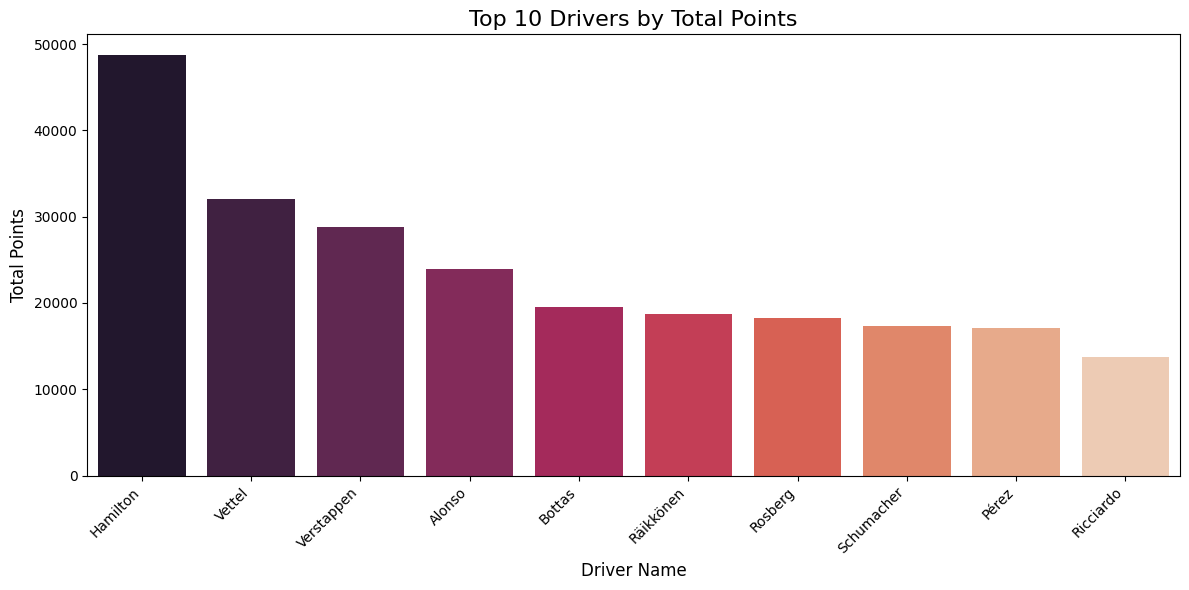

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `final_df` is your merged dataset
agg_points, total_races, pivot_table, avg_points_pivot = aggregate_data(final_df)

# Create a bar chart for total points by driver
top_10_drivers = agg_points.head(10)

# Plot the top 10 drivers by their points
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_drivers, x='surname', y='points_y', palette='rocket')

# Set plot title and labels
plt.title('Top 10 Drivers by Total Points', fontsize=16)
plt.xlabel('Driver Name', fontsize=12)
plt.ylabel('Total Points', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate driver names for better readability
plt.tight_layout()

# Show the plot
plt.show()


2. Bar Chart for Drivers with Most 1st Positions:
Analyzes and visualizes the top 10 drivers with the highest number of 1st-place finishes. It filters the dataset for positions equal to 1, counts the occurrences for each driver, merges with driver names, and plots a bar chart. The chart displays driver names on the x-axis and the count of 1st positions on the y-axis, with customized labels, a plasma color palette, and rotated x-axis labels for clarity.


<ipython-input-29-707ea7b605f1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_first_positions, x='forename', y='position', palette='flare')


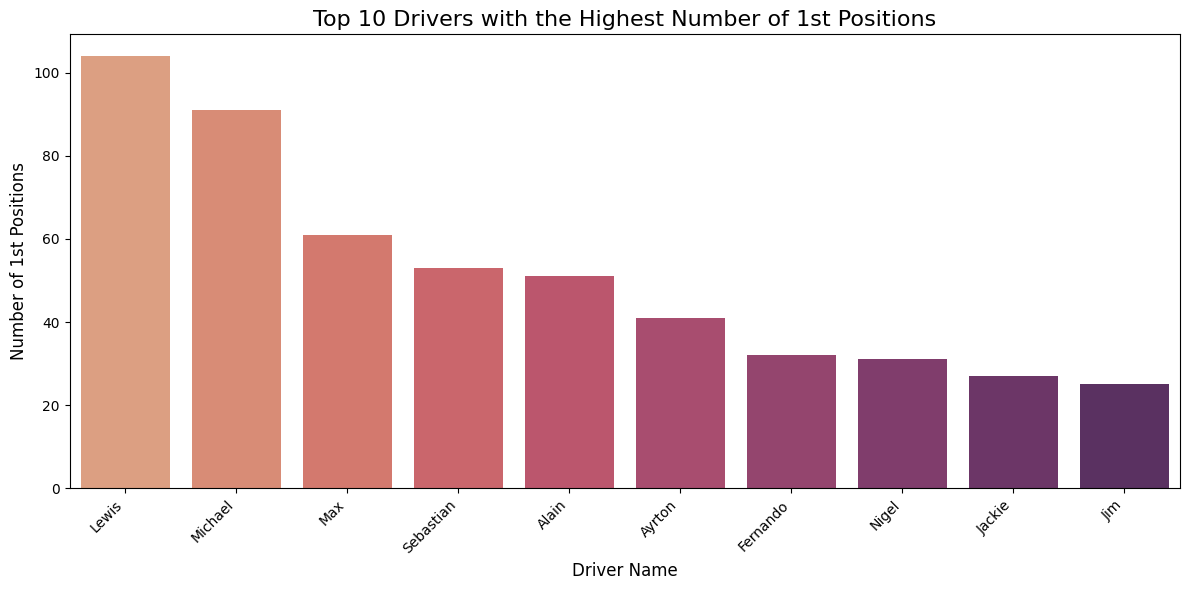

In [29]:
first_positions = results[results['position'] == 1]

# Count the number of 1st positions per driver
first_positions_count = first_positions.groupby('driverId')['position'].count().reset_index()

# Merge with driver names
first_positions_count = pd.merge(first_positions_count, drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

# Sort the drivers by number of 1st positions (descending order)
first_positions_count = first_positions_count.sort_values(by='position', ascending=False)

# Get the top 10 drivers with the highest 1st positions
top_10_first_positions = first_positions_count.head(10)

# Plot the top 10 drivers with the most 1st positions
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_first_positions, x='forename', y='position', palette='flare')

# Set plot title and labels
plt.title('Top 10 Drivers with the Highest Number of 1st Positions', fontsize=16)
plt.xlabel('Driver Name', fontsize=12)
plt.ylabel('Number of 1st Positions', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate driver names for better readability
plt.tight_layout()

# Show the plot
plt.show()

3. Scatter Plot of Race Results for the Top Driver:
Visualizes the race performance of the driver with the highest total points. The scatter plot displays race positions across races, sorted by race ID. Non-numeric and missing position values are handled, ensuring clean data. The plot includes custom labels, a title indicating the driver's name, and a grid for better readability, offering insights into the consistency of the driver's performance.

<ipython-input-35-0e3c3376b713>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_driver_results['position_x'] = pd.to_numeric(top_driver_results['position_x'], errors='coerce')


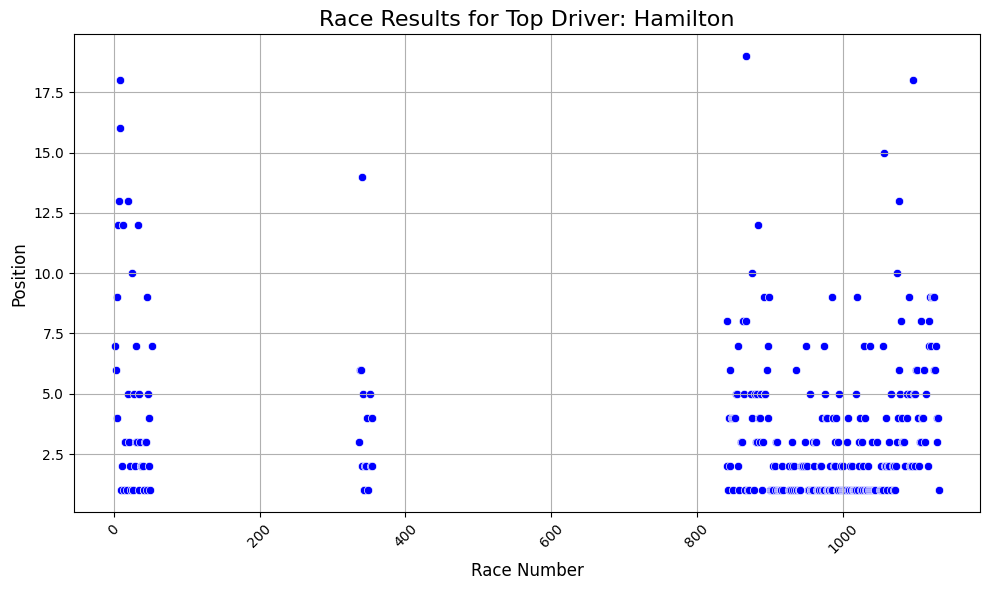

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the top driver based on total points from agg_points (since it only has surname and points)
top_driver_surname = agg_points['surname'].iloc[0]  # Get the surname of the top driver

# Find the driverId corresponding to this surname in the combined_df
top_driver_id = final_df[final_df['surname'] == top_driver_surname]['driverId'].iloc[0]

# Now filter the data for the top driver
top_driver_results = final_df[final_df['driverId'] == top_driver_id]

# Ensure 'position_x' is numeric and handle non-numeric values
top_driver_results['position_x'] = pd.to_numeric(top_driver_results['position_x'], errors='coerce')

# Sort by raceId to order the races
top_driver_results = top_driver_results.sort_values(by='raceId')

# Drop any rows where 'position_x' is NaN (i.e., the data was not convertible to numeric)
top_driver_results = top_driver_results.dropna(subset=['position_x'])

# Create a scatter plot of the driver's position across races
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_driver_results, x='raceId', y='position_x', color='blue', marker='o')

# Adding labels and title
top_driver_name = f"{top_driver_surname}"  # Use surname directly as top_driver_surname holds it
plt.title(f"Race Results for Top Driver: {top_driver_name}", fontsize=16)
plt.xlabel("Race Number", fontsize=12)
plt.ylabel("Position", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


4. Position Gain Analysis for Drivers:
This code calculates the position gain for each driver, which is the difference between the starting grid position and the final race position. It then sums the position gains across all races for each driver, identifying the top 10 drivers with the highest total position gains. The results are printed and visualized in a bar chart, showing the drivers' total position gain (indicating how much they improved during races).

Key steps:
Convert position_x (final race position) and grid (starting position) to numeric values.
Calculate the position gain by subtracting the final position from the starting grid position.
Sum the position gains by driver and sort the drivers to identify the top 10.
Plot a bar chart with the top drivers and their total position gains.
The chart shows which drivers have the greatest improvement from grid to race position, highlighting their performance over the course of the races.

      forename     surname  position_gain
3     Fernando      Alonso          582.0
186       John      Watson          522.0
104    Michele    Alboreto          504.0
64      Johnny     Herbert          489.0
155   Jonathan      Palmer          487.0
122    Thierry     Boutsen          471.0
17      Jenson      Button          469.0
83      Martin     Brundle          462.0
20   Giancarlo  Fisichella          453.0
223    Emerson  Fittipaldi          437.0


<ipython-input-36-bd8015353977>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drivers_position_gain, x='forename', y='position_gain', palette='viridis')


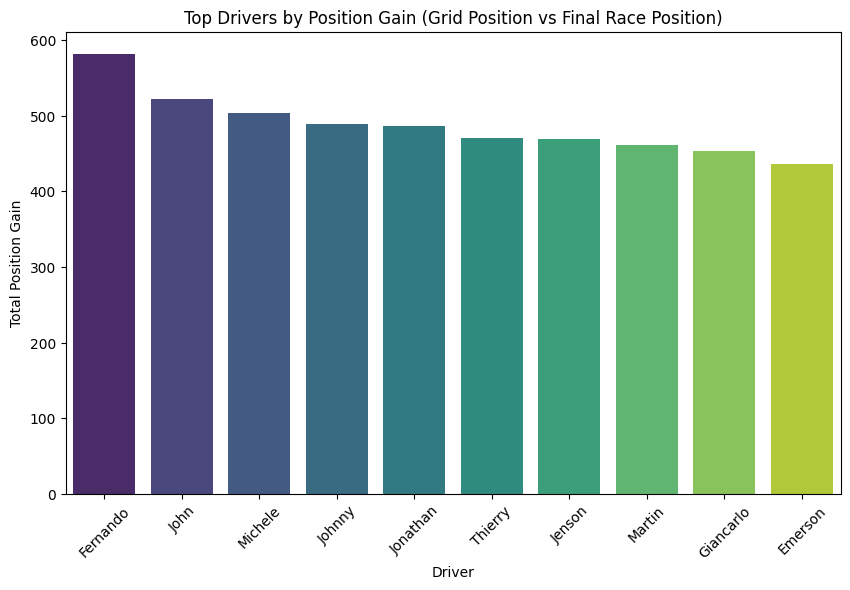

In [36]:
# Ensure that 'position_x' and 'grid' are numeric
final_df['position_x'] = pd.to_numeric(final_df['position_x'], errors='coerce')
final_df['grid'] = pd.to_numeric(final_df['grid'], errors='coerce')

# Calculate the position gain (grid position - final race position)
final_df['position_gain'] = final_df['grid'] - final_df['position_x']

# Group by driver and sum up the position gains (sum of position gain across all races for each driver)
driver_position_gain = final_df.groupby('driverId')['position_gain'].sum().reset_index()

# Merge with driver names for better understanding
driver_position_gain = pd.merge(driver_position_gain, drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

# Sort by position gain to find top drivers
top_drivers_position_gain = driver_position_gain.sort_values(by='position_gain', ascending=False).head(10)

# Print the top drivers
print(top_drivers_position_gain[['forename', 'surname', 'position_gain']])

# Plot the top drivers' position gains
plt.figure(figsize=(10, 6))
sns.barplot(data=top_drivers_position_gain, x='forename', y='position_gain', palette='viridis')
plt.title('Top Drivers by Position Gain (Grid Position vs Final Race Position)')
plt.xlabel('Driver')
plt.ylabel('Total Position Gain')
plt.xticks(rotation=45)
plt.show()


5.Pair Plot of Driver Performance Data:
Generates a pair plot to explore relationships between key performance metrics such as points, position, laps, and fastest lap speed. The data is prepared by merging results and standings datasets, and relevant columns are selected for visualization. The pair plot helps identify trends and correlations among the selected variables, with a title added for context.

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverStandingsId', 'raceId_y',
       'points_y', 'position_y', 'positionText_y', 'wins'],
      dtype='object')


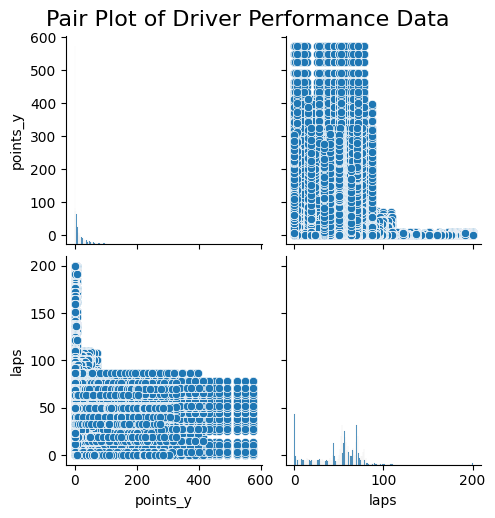

In [37]:
pairplot_columns = ['points_y', 'position', 'laps', 'fastestLapSpeed']

# Combine the dataframes `results` and `driver_standings` on 'driverId'
combined_df = pd.merge(results, standings, on='driverId', how='left')

# Check the column names in the merged DataFrame to verify the presence of 'position'
print(combined_df.columns)
# Define the columns for the pair plot
pairplot_columns = ['points_y', 'position_x', 'laps', 'fastestLapSpeed']

# Create the pair plot
sns.pairplot(combined_df[pairplot_columns])

# Set plot title
plt.suptitle("Pair Plot of Driver Performance Data", y=1.02, fontsize=16)

# Show the plot
plt.show()


6. Find the Driver with Most Wins:
This code groups the final_df dataset by driverId, sums up the number of wins per driver, and then merges the result with the drivers dataset to add driver names. It identifies and prints the driver with the most wins by locating the row with the highest win count.

The output will display the driver’s ID, first name (forename), last name (surname), and total wins, indicating the driver with the most wins.

In [38]:
# Group by driver and sum wins to find the driver with the most wins
driver_wins = final_df.groupby('driverId')['wins'].sum().reset_index()

# Merge with driver names for better labeling
driver_wins = pd.merge(driver_wins, drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')

# Find the driver with the most wins
most_wins_driver = driver_wins.loc[driver_wins['wins'].idxmax()]

print(most_wins_driver)


driverId           1
wins          1009.0
forename       Lewis
surname     Hamilton
Name: 0, dtype: object
